<a href="https://colab.research.google.com/github/E-wave112/ml_proj_2/blob/master/ustacky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')
#change directory to my ustacky directory (where my files are located)
%cd /content/drive/MyDrive/ustacky

/content/drive/MyDrive/ustacky


In [ ]:
extension = 'csv'
all_csv_files=[files for files in glob.glob('*.csv')]
##combine all files into a single csv file
super_ustacky= pd.concat([pd.read_csv(files) for files in all_csv_files])
super_ustacky.to_csv('main_data.csv',index=False,encoding='utf-8-sig')

In [ ]:
##read the new dataset
df = pd.read_csv('main.csv')
##print the first five rows of the dataset
print(df.head())

    Invoice ID Branch   City  ... gross margin percentage gross income Rating
0  692-92-5582      B  Abuja  ...                4.761905      2961.36    5.9
1  351-62-0822      B  Abuja  ...                4.761905      1042.56    4.5
2  529-56-3974      B  Abuja  ...                4.761905      1836.72    6.8
3  299-46-1805      B  Abuja  ...                4.761905     10121.76    4.5
4  319-50-3348      B  Abuja  ...                4.761905      1450.80    4.4

[5 rows x 17 columns]


In [ ]:
##get the shape of the dataset
df.shape

(1000, 17)

In [ ]:
##get the names of the columns\
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
##generate descriptive statistics
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.220360e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


                    Key Takeaways

* from the summary statistics, we can see that only 8 out of the 17 columns are in fact numeric

* Within the average 6.97 ratings, 75% of the users rated the supermarkets 8.5

* The average and maximum gross income were favourable

* From the above summary statistics, we can also deduce that the unit price for each quantity were affordable by most customers standards as their deviation from the mean wasn't that significant

In [ ]:
##check for missing values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
##get further information and metadata about the dataset using thr info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
##convert the date and time column to a datetime type
df.Date= pd.to_datetime(df.Date)
df.Time = pd.to_datetime(df.Time)

In [ ]:
##confirm thst the datatype was successsfully converted
print(df.Date[0])
print(type(df.Date[0]),type(df.Time[0]))

2019-02-20 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
##extract the day,month,year and hour from the Date and time column respectively

##extract the days
df['Day']=[i.day for i in df.Date]
##affirm that it has been extracted
print(df['Day'].head())

##extract the month
df['Month']=[i.month for i in df.Date]
##affirm that it has been extracted
print(df['Month'].head())


##extract the year
df['Year']=[i.year for i in df.Date]
##affirm that it has been extracted
print(df['Year'].head())


##extract the hour from the Time column
df['Hour']=[i.hour for i in df.Time]
##affirm that it has been extracted
print(df['Hour'].head())

0    20
1     6
2     9
3    15
4    11
Name: Day, dtype: int64
0    2
1    2
2    3
3    1
4    3
Name: Month, dtype: int64
0    2019
1    2019
2    2019
3    2019
4    2019
Name: Year, dtype: int64
0    13
1    18
2    17
3    16
4    15
Name: Hour, dtype: int64


In [ ]:
#determine the numbers of unique hours of sales in the supermarket
len(pd.unique(df.Hour))

11

In [ ]:
##eturn an array of the hours using the unique() method
np.unique(df.Hour)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [ ]:
##get the categorical columns
categorical_columns = [col for col in df.columns if df[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [ ]:
for val in categorical_columns:
  var = df[val].unique().tolist()
  print('unique_values:{a},corresponding_length:{b}\n\n'.format(a=var,b=len(var)))

unique_values:['692-92-5582', '351-62-0822', '529-56-3974', '299-46-1805', '319-50-3348', '371-85-5789', '273-16-6619', '649-29-6775', '145-94-9061', '871-79-8483', '149-71-6266', '640-49-2076', '777-82-7220', '280-35-5823', '354-25-5821', '132-32-9879', '370-41-7321', '727-46-3608', '669-54-1719', '616-24-2851', '242-55-6721', '347-34-2234', '853-23-2453', '109-28-2512', '510-95-6347', '847-38-7188', '318-68-5053', '152-08-9985', '766-85-7061', '733-01-9107', '716-39-1409', '479-26-8945', '227-78-1148', '291-32-1427', '659-65-8956', '378-24-2715', '219-22-9386', '268-27-6179', '549-84-7482', '191-10-6171', '695-51-0018', '590-83-4591', '241-72-9525', '262-47-2794', '608-96-3517', '279-74-2924', '307-85-2293', '743-04-1105', '423-57-2993', '548-46-9322', '505-02-0892', '316-55-4634', '608-27-6295', '414-12-7047', '895-66-0685', '305-14-0245', '732-04-5373', '284-34-9626', '437-58-8131', '641-43-2399', '542-41-0513', '875-46-5808', '394-43-4238', '573-58-9734', '817-69-8206', '142-63-60

In [ ]:
##create a small helper function that will extract the neccesary keys that will be later used in our aggregation function later
def get_keys(d):
  for i in d.keys():
    if d[i] == max(d.values()):return i

  return False

In [ ]:
##perform aggregation function on the grosss income grouping by the City
groups = df.groupby('City')['gross income'].sum()
##convert to a key-value mapper and find the city with the highest gross income
print('the city with the highest gross income:')
print(get_keys(dict(groups)))
print("=="*30)


##perform aggregation function on the unit price grouping by the City
group_unit = df.groupby('City')['Unit price'].sum()
print('the city with the highest unit price:')
print(get_keys(dict(group_unit)))
print("=="*30)


##perform aggregation function on the unit price grouping by the City
group_qty = df.groupby('City')['Quantity'].sum()
print('the city with the highest quantity:')
print(get_keys(dict(group_qty)))

the city with the highest gross income:
Port Harcourt
the city with the highest unit price:
Lagos
the city with the highest quantity:
Lagos


Text(0.5, 1.0, 'Highest Sales record across all branches')

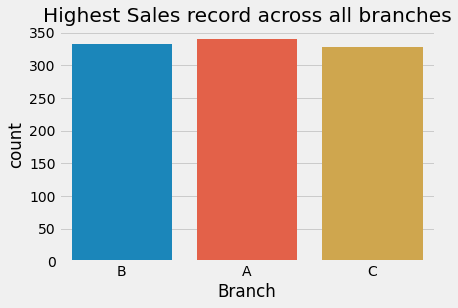

In [ ]:
##use a seaborn visualization  to determine the branch with the highest sales record
sns.countplot(x='Branch',data=df).set_title('Highest Sales record across all branches')#A definitely has the highest sales

Text(0.5, 1.0, 'Highest mode of payment across all supermarkets')

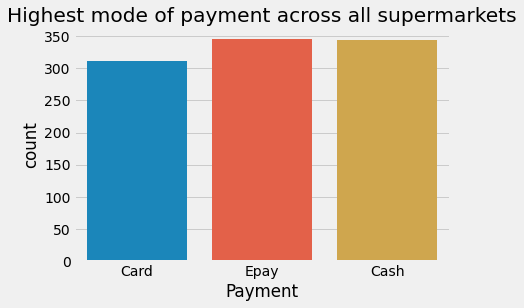

In [ ]:
##use a seaborn visualization  to determine the most common payment method used in the supermarket
sns.countplot(x='Payment',data=df).set_title('Highest mode of payment across all supermarkets')#Epay slightly edges this one

Text(0.5, 1.0, 'Highest and lowest Product Line')

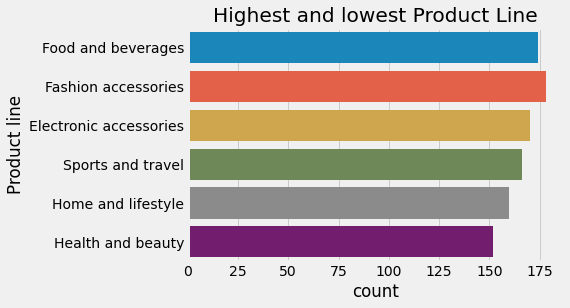

In [ ]:
##Determine the highest & lowest sold product line, using Countplot
sns.countplot(y='Product line',data=df).set_title('Highest and lowest Product Line')#highest was the fashion accessories and lowest were health & beauty

Text(0.5, 1.0, 'Most common payment format used across each Product Line')

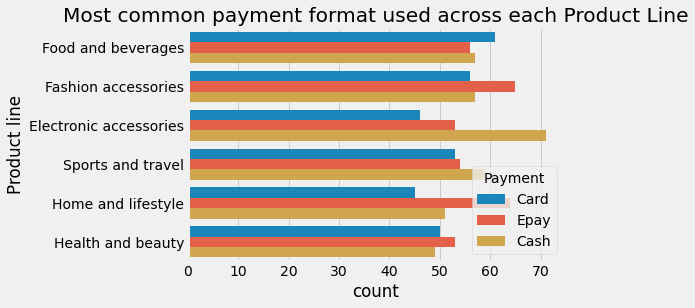

In [ ]:
## Determine the Payment channel used by most customer to pay for each product line
sns.countplot(y='Product line',hue='Payment',data=df).set_title('Most common payment format used across each Product Line')


Text(0.5, 1.0, 'payment channel format used for each branch')

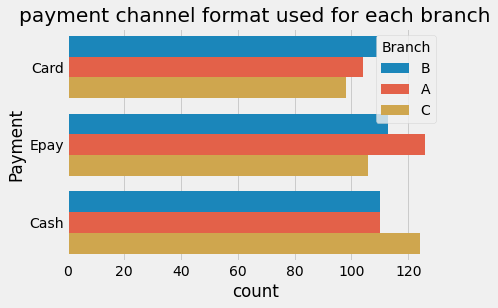

In [ ]:
##Determine the Payment channel for each branch.
sns.countplot(y='Payment',hue='Branch',data=df).set_title('payment channel format used for each branch')

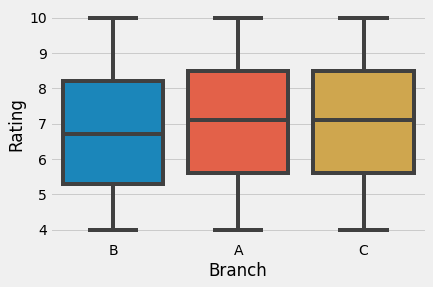

In [ ]:
##Determine the branch with the lowest rating do this via a boxplot
sns.boxplot(x='Branch',y='Rating',data=df)##B has the lowest rating

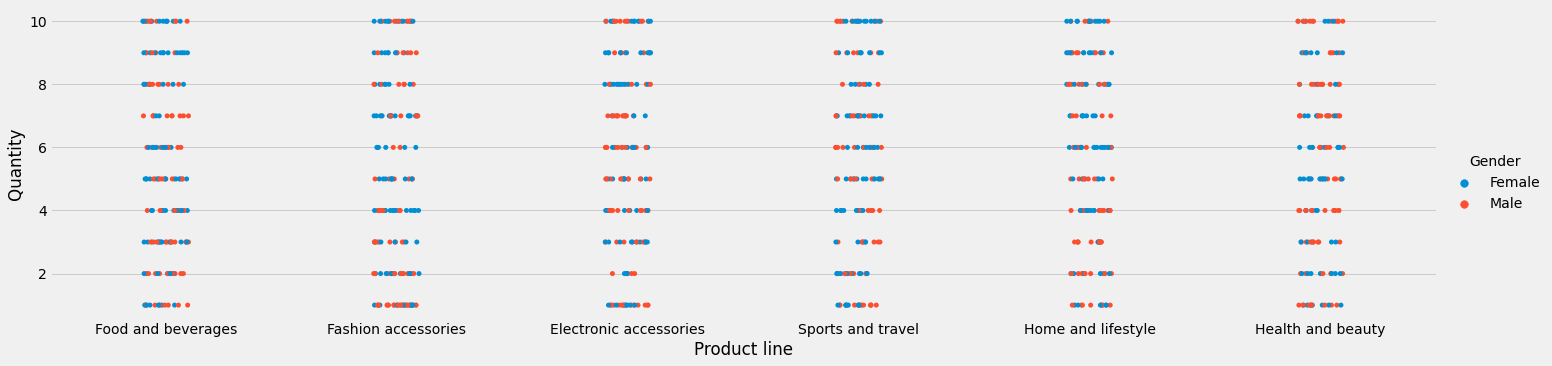

In [ ]:
##generate a seaborn catplot visualization on the quantity of products bought based on a person's gender
sns.catplot(x='Product line',y='Quantity',hue='Gender',data=df,aspect=4)

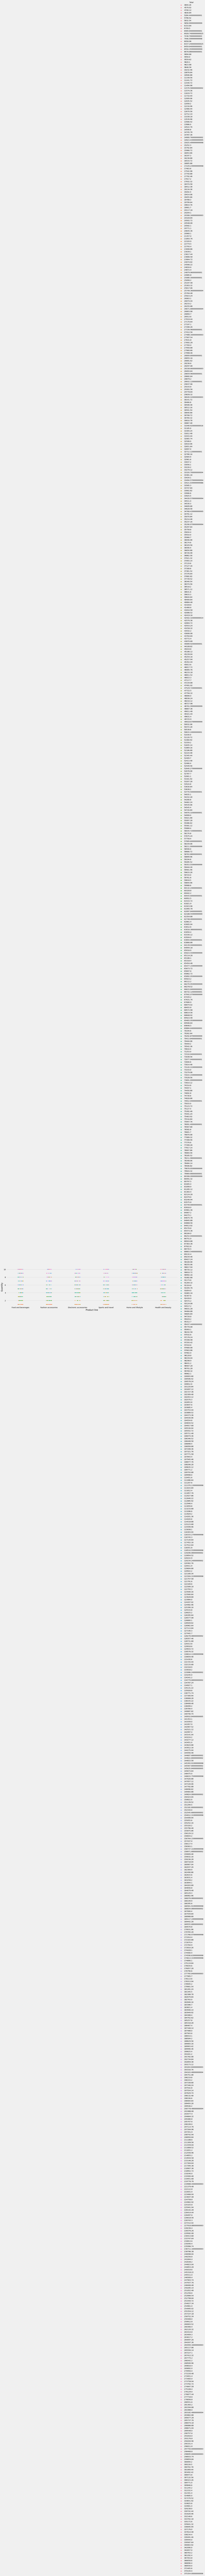

In [ ]:
##generate a seaborn catplot visualization on the quantity of products bought based on a person's gender
sns.catplot(x='Product line',y='Quantity',hue='Total',data=df,aspect=4)

Insight Generated from the Catplot Below

From the visualization below, it clearly shows that the more expensive products across all product line were purchased the least, the products of the cheapest total prices were purchased more, while the medium priced products were simply a matter of choice or other wise at the median of the number of products purchased.

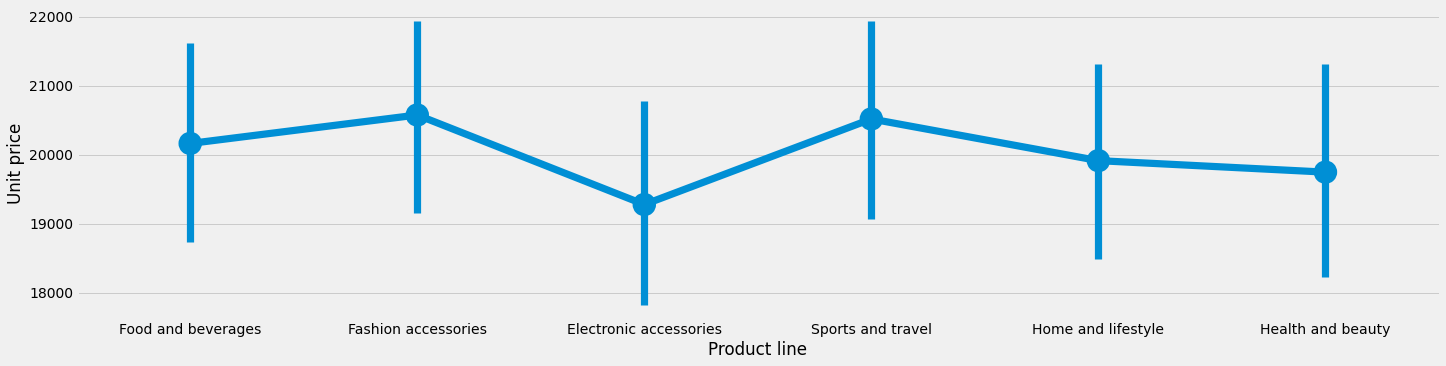

In [ ]:
##explore is the interaction of Unit price on the Quantity of goods(product lines) purchased using seaborn catplot
sns.catplot(x='Product line',y='Unit price',data=df,kind='point',aspect=4)

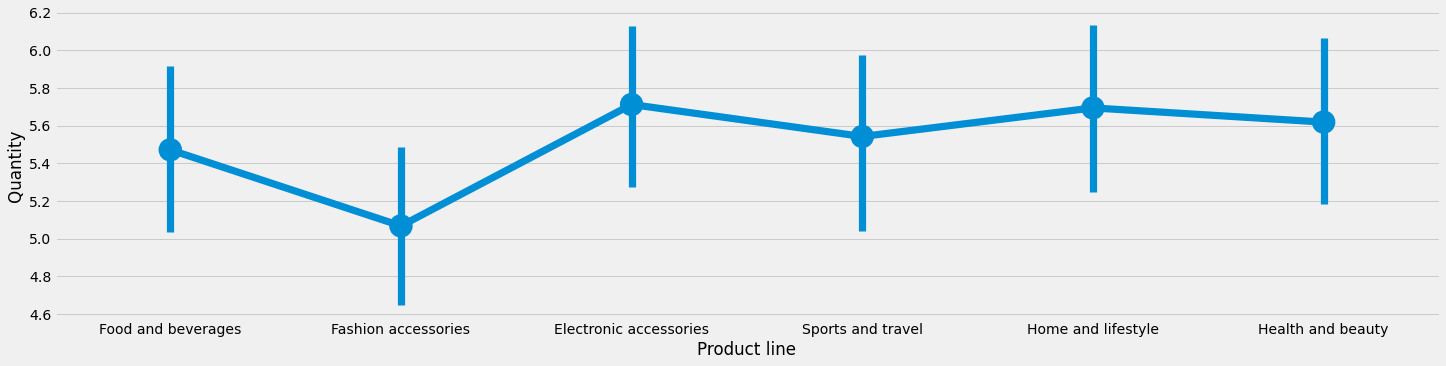

In [ ]:
##explore is the interaction of Unit price on the Quantity of goods(product lines) purchased using seaborn catplot
sns.catplot(x='Product line',y='Quantity',data=df,kind='point',aspect=4)

Final Insights

Based on our last two catplot visualizations relating the product line against the unit price and quantity respectively, one can deduce that there is an inverse relationship between the the unit price of a product and the quantity of the product that will be bought (i.e, the moderate(lower)the price, the higher the quantity demanded or vice-versa)